In [1]:
%matplotlib widget
import sys
sys.path.append('/home/massoale/Stage_M2/Analyse/Stage_M2-main/stage_diags/diagnostics_pkg/')
sys.path.append('/home/massoale/Stage_M2/Analyse/Stage_M2-main/stage_diags/diagnostics_pkg/.ipynb_checkpoints')
sys.path.append('/home/massoale/Stage_M2/Analyse/qgutils-master/')
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import io_utils as io
import operators as op
import qgutils as qg
import xarray as xr
import scipy as sp

In [8]:
#Number of simulation you want to load
#simu_numbers=np.array([47,48,49,50,51,52,53,54])

simu_numbers=np.array([n for n in range(62,75) if n!=66])
simu_name_tab=np.array([f'String {num}' for num in simu_numbers])

#Arrays where I will store the parameters:

kh_E_tab= np.zeros_like(simu_numbers,dtype='float') 
k_f_tab= np.zeros_like(simu_numbers,dtype='float')
k_beta_tab= np.zeros_like(simu_numbers,dtype='float')
Z_tab=np.zeros_like(simu_numbers,dtype='float')
#Choose between 'local' or 'dahu'
where='dahu'


#Reading the netcdf file

for i,n in enumerate(simu_numbers):
    if where=='local':
        if n<10:
            simu_name='outdir_000'+str(n)
        elif n<100 and n>=10:
            simu_name='outdir_00'+str(n)
        Path='/home/massoale/Simu_Test/qgw-main/src/'+simu_name+'/'

    elif where=='dahu':
        simu_name='dahu_'+str(n)
        Path='/home/massoale/Simu_Test/simu_dahu/simu_dahu'+str(n)+'/outdir_0001/'
        
    else:
        print('Error: where not recognized')
        sys.exit()
    print('la simulation chargée est: ' + simu_name )
    print("depuis: "+where)
    simu_name_tab[i]=simu_name
    print(simu_name_tab)
    filenames=['/vars.nc']



    dataset=nc.Dataset(Path+filenames[0])

    #t=dataset.variables['time'][:]
    #x=dataset.variables['x'][:]
    #y=dataset.variables['y'][:]
    #psi=dataset.variables['psi'][:,:,:,:]
    #q=dataset.variables['q'][:,:,:,:]
    #print("psi shape",psi.shape)
    
    #Lecture des paramètres :

    param=io.read_params(Path)

    f0= param['f0']
    beta=param['beta']
    hEkb=param['hEkb']
    dh=param['dh'][0]
    Lx=param['Lx']
    nx=param['NX']
    ny=param['NY']
    k_f=param['k_f']
    sigma_f=param['sigma_f']
    bc_fac=param['bc_fac']
    nu_hyper=param['nu_hyper']
    n_hyper=param['n_hyper']
    dt_out=param['dt_out']

    epsilon=sigma_f**2
    r=f0*hEkb/(2*dh)
    
    #Calcul de kh_E
    kh_E=np.sqrt(r**3/epsilon)
    kh_E_tab[i]=kh_E

    #Calcul de k_beta
    k_beta=(beta**3/epsilon)**(1/5)
    k_beta_tab[i]=k_beta

    k_f_tab[i]=k_f

    #computing zonostrophy:

    Z_tab[i]= (beta**2*epsilon/(r**5))**(1/20)
    print('Zonostrophie:',Z_tab[i]) 
    


la simulation chargée est: dahu_62
depuis: dahu
['dahu_62' 'String 63' 'String 64' 'String 65' 'String 67' 'String 68'
 'String 69' 'String 70' 'String 71' 'String 72' 'String 73' 'String 74']
Zonostrophie: 6.745815962247
la simulation chargée est: dahu_63
depuis: dahu
['dahu_62' 'dahu_63' 'String 64' 'String 65' 'String 67' 'String 68'
 'String 69' 'String 70' 'String 71' 'String 72' 'String 73' 'String 74']
Zonostrophie: 2.817585085135084
la simulation chargée est: dahu_64
depuis: dahu
['dahu_62' 'dahu_63' 'dahu_64' 'String 65' 'String 67' 'String 68'
 'String 69' 'String 70' 'String 71' 'String 72' 'String 73' 'String 74']
Zonostrophie: 3.592768096283483
la simulation chargée est: dahu_65
depuis: dahu
['dahu_62' 'dahu_63' 'dahu_64' 'dahu_65' 'String 67' 'String 68'
 'String 69' 'String 70' 'String 71' 'String 72' 'String 73' 'String 74']
Zonostrophie: 5.010453542928485
la simulation chargée est: dahu_67
depuis: dahu
['dahu_62' 'dahu_63' 'dahu_64' 'dahu_65' 'dahu_67' 'String 68' 'Str

['dahu_62' 'dahu_63' 'dahu_64' 'dahu_65' 'dahu_67' 'dahu_68' 'dahu_69'
 'dahu_70' 'dahu_71' 'dahu_72' 'dahu_73' 'dahu_74']


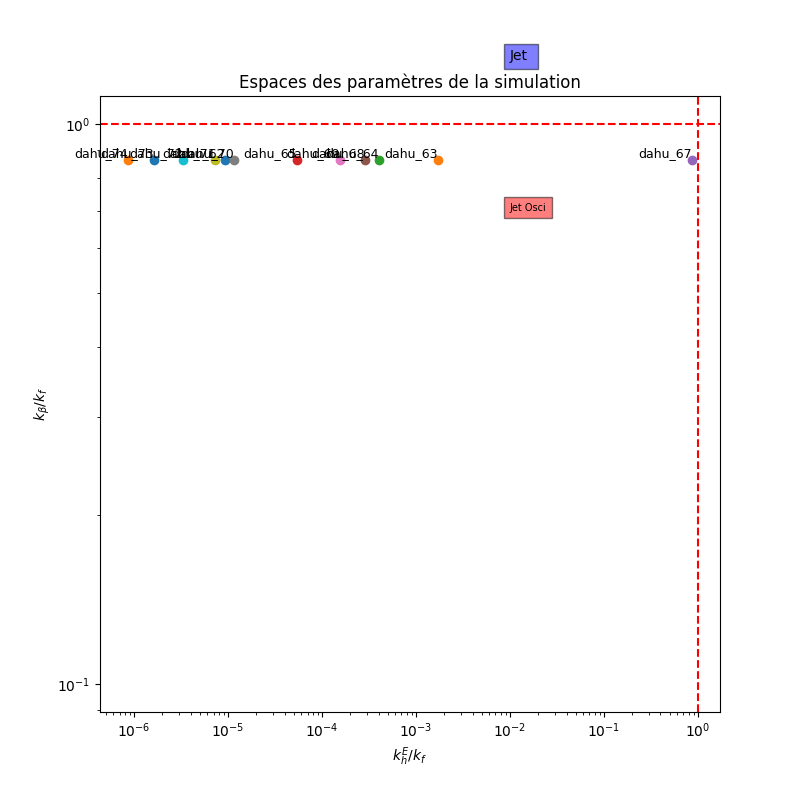

In [9]:
#Plotting the parameters space

print(simu_name_tab)

x=kh_E_tab/k_f_tab
y=k_beta_tab/k_f_tab
plt.figure(figsize=(8,8))
# Plotting the data with descriptions
for i, desc in enumerate(simu_name_tab):
    plt.scatter(x[i], y[i], label=desc)
    plt.text(x[i], y[i], desc, fontsize=9, ha='right', va='bottom')

# Setting logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k_h^E/k_f$')
plt.ylabel(r'$k_\beta/k_f$')
plt.axhline(y=1, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')

#plt.text(1.2, 1.3, 'Zone 1', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 0.7, 'Jet Osci', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 1.3, 'Jet ', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))


plt.title('Espaces des paramètres de la simulation')
plt.show()


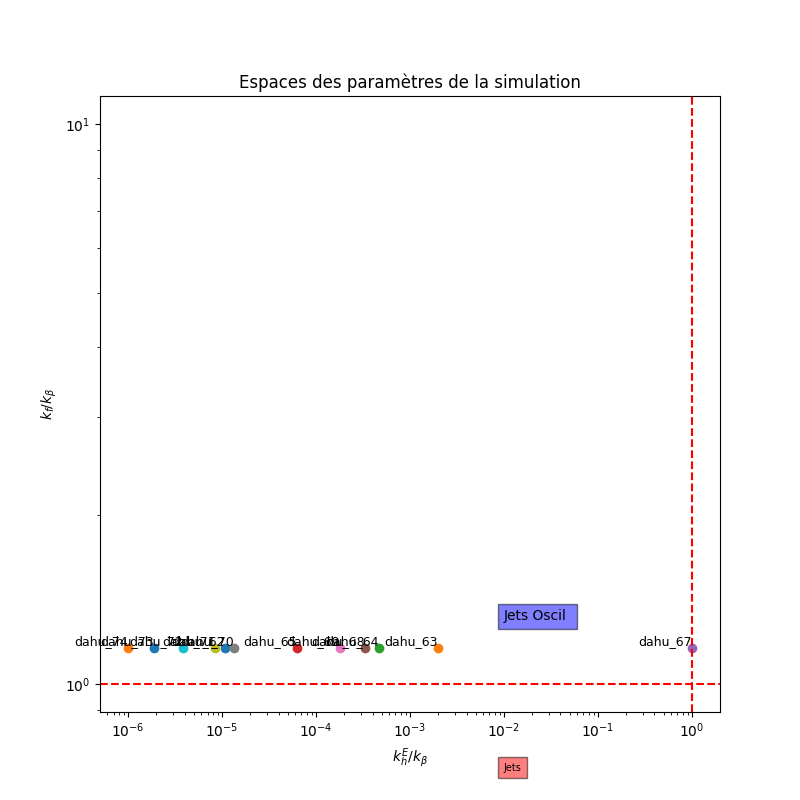

In [10]:
x=kh_E_tab/k_beta_tab
y=k_f_tab/k_beta_tab

plt.figure(figsize=(8,8))
# Plotting the data with descriptions
for i, desc in enumerate(simu_name_tab):
    plt.scatter(x[i], y[i], label=desc)
    plt.text(x[i], y[i], desc, fontsize=9, ha='right', va='bottom')

# Setting logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_h^E/k_\beta$')
plt.ylabel(r'$k_f/k_\beta$')
plt.axhline(y=1, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')

#plt.text(1.2, 1.3, 'Zone 1', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 0.7, 'Jets', fontsize=7, bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.01, 1.3, 'Jets Oscil ', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))


plt.title('Espaces des paramètres de la simulation')
plt.show()


# Plotting the zonostrophy

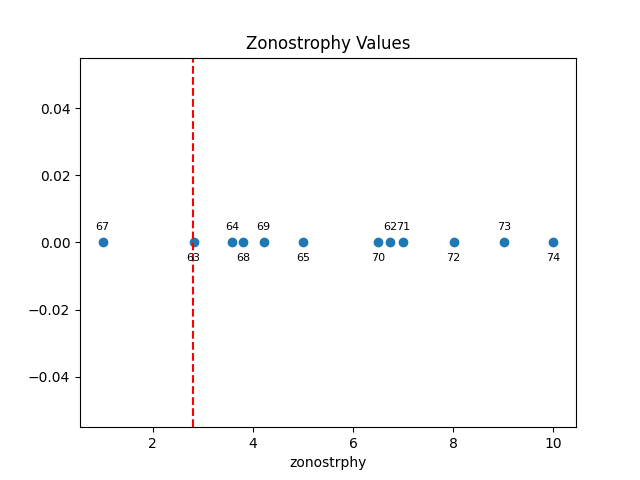

[0.99992401 2.81758509 3.5927681  3.80025551 4.21327242 5.01045354
 6.5000993  6.74581596 7.00212196 8.00507347 9.00955474 9.99924013]


In [27]:
plt.figure()

# Plotting the scatter plot
plt.scatter(Z_tab, [0] * Z_tab.shape[0])

# Adding text above each point
for i, desc in enumerate(simu_name_tab):
    if i%2==0:

        plt.text(Z_tab[i], 0.006, desc[-2:], fontsize=8, ha='center', va='top')
    else:
        plt.text(Z_tab[i], -0.006, desc[-2:], fontsize=8, ha='center', va='bottom')

plt.xlabel('zonostrphy')
plt.title('Zonostrophy Values')
plt.axvline(x=2.8, color='r', linestyle='--')
plt.show()

print(np.sort(Z_tab))

In [20]:
string="bonjour"
print(string[0:2])

bo
